github link:https://github.com/Maniharshith18/SVM-Kernel-Tutorial.git

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap


In [4]:
def plot_svm_decision_boundary(model, X, y, ax, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)

    # highlight support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

    ax.set_title(title)
    ax.legend()


In [5]:
# Linear dataset
X_linear, y_linear = make_classification(n_samples=200, n_features=2,
                                         n_informative=2, n_redundant=0,
                                         n_clusters_per_class=1, flip_y=0.1,
                                         class_sep=2, random_state=42)

# Moons dataset
X_moons, y_moons = make_moons(n_samples=200, noise=0.2, random_state=42)

# Circles dataset
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)


In [6]:
# List of kernels and parameters to explore
kernels = {
    'Linear': {'kernel': 'linear'},
    'Poly degree 3': {'kernel': 'poly', 'degree': 3, 'C':1},
    'RBF gamma 1': {'kernel': 'rbf', 'gamma': 1, 'C':1}
}

datasets = {
    'Linear': (X_linear, y_linear),
    'Moons': (X_moons, y_moons),
    'Circles': (X_circles, y_circles)
}


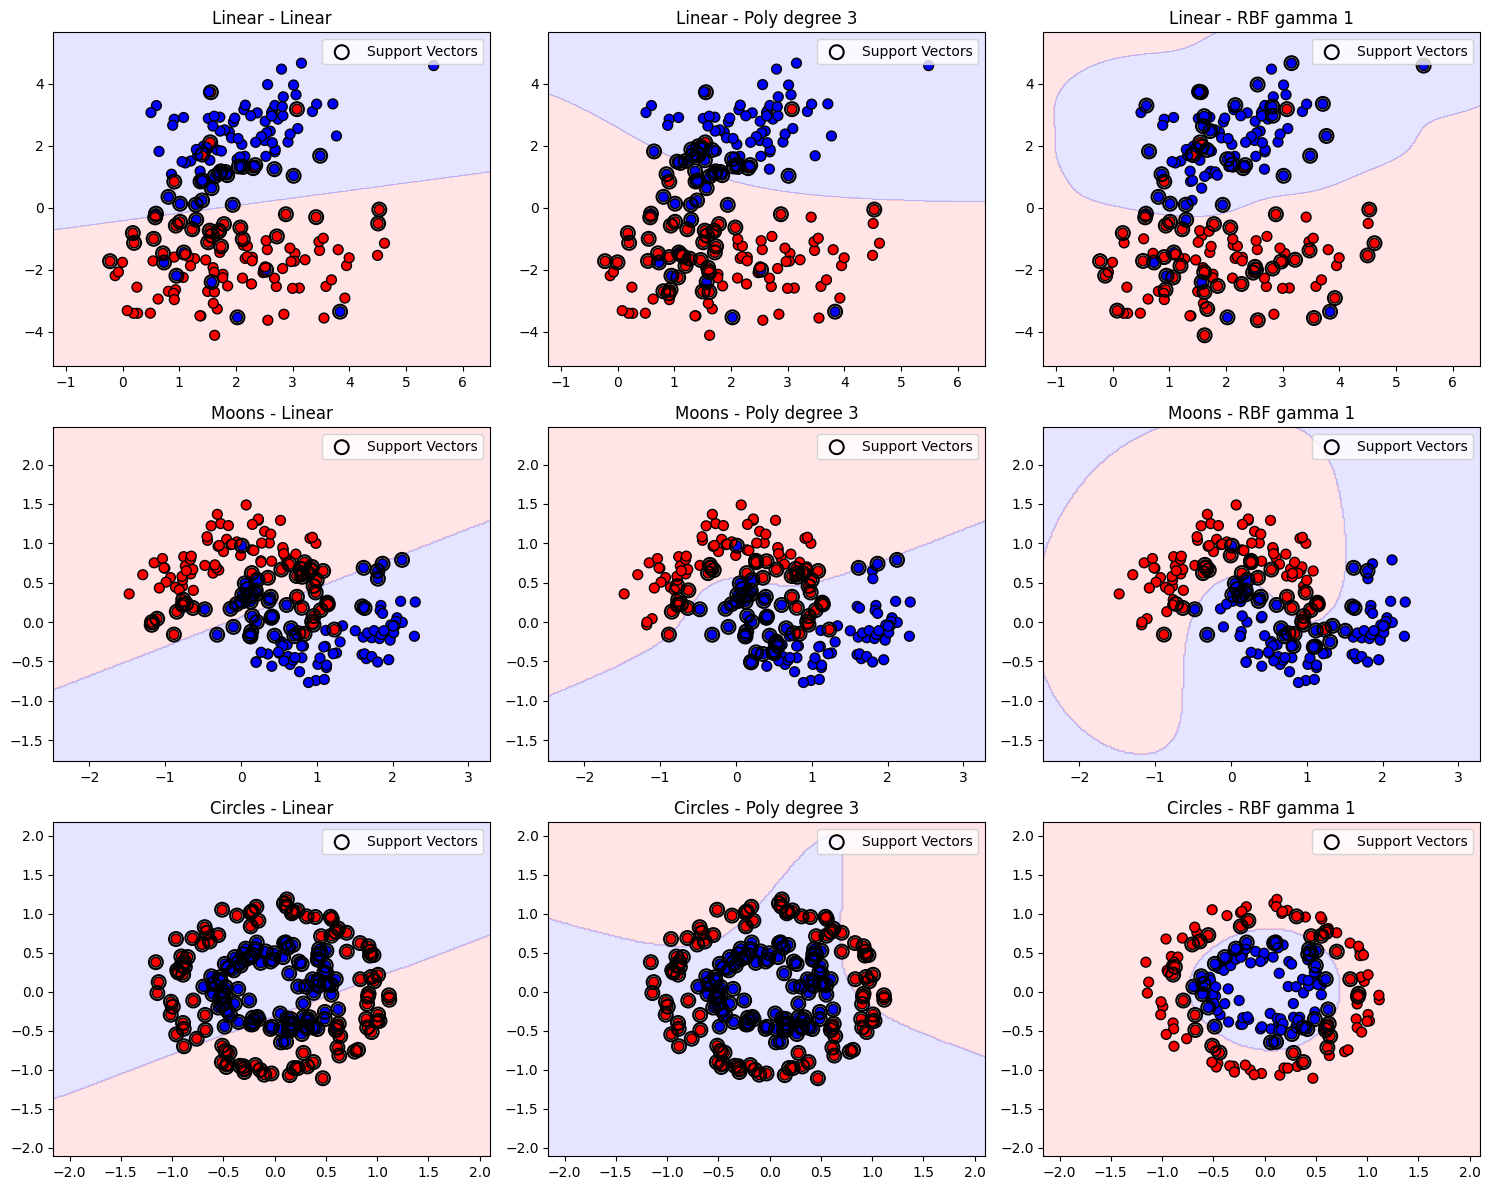

In [7]:
fig, axes = plt.subplots(len(datasets), len(kernels), figsize=(15, 12))

for i, (ds_name, (X, y)) in enumerate(datasets.items()):
    for j, (kernel_name, params) in enumerate(kernels.items()):
        model = SVC(**params)
        model.fit(X, y)
        plot_svm_decision_boundary(model, X, y, axes[i, j], f'{ds_name} - {kernel_name}')

plt.tight_layout()
plt.show()


In [8]:
for i, (ds_name, (X, y)) in enumerate(datasets.items()):
    for j, (kernel_name, params) in enumerate(kernels.items()):
        model = SVC(**params)
        model.fit(X, y)
        fig, ax = plt.subplots(figsize=(6,5))
        plot_svm_decision_boundary(model, X, y, ax, f'{ds_name} - {kernel_name}')
        fig.savefig(f'{ds_name}_{kernel_name}.png', dpi=300)
        plt.close(fig)
